<a href="https://colab.research.google.com/github/jieun2022/Data-Science-Team-E/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <넷플릭스 콘텐츠의 자극성에 관한 분석>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

# 1.서론

## 1-1 주제 선정 이유

올드미디어의 시대가 지고 새로이 떠오른 미디어계의 태풍은 OTT 산업이다. 이미 성숙기에 접어든 OTT 시장은 전 세계의 문화콘텐츠 전반의 유행을 가장 파급력있게 비출 뿐만 아니라 새로운 방식의 미디어 발전 방향을 제시하고 있다.

그중 OTT 시장에서 가장 큰 입지를 가지고 있는 기업은 Netflix이다. 넷플릭스 도입 이후 성인관람등급의 콘텐츠가 크게 유행하는 사례들 역시 빈번히 생겨났으며, 이에 대한 사회적 우려 역시 커지고 있는 현실이다. 그래서 "정말 넷플릭스가 생산 및 제공하는 자극적인 콘텐츠의 수가 점차 늘어나는 것인가?"와 같은 의문점을 가지게 되었다.
이러한 의문에서 비롯하여 넷플릭스 콘텐츠 동향에 대한 분석을 하고자 하였다. 또한 자극적인 콘텐츠 생산 및 제공량이 증가하였다면 그 원인은 어떤 것인지에 대해 두 가지 관점에서 데이터 분석을 진행하려한다.


## 1-2 넷플릭스 데이터 전처리

넷플릭스는 현재 OTT 산업에서 가장 큰 규모를 가지고 있는 미디어 스트리밍 플랫폼이다. 약 8000여 편 이상의 영화 및 TV 프로그램을 보유하고 있으며, 2022년 4월 19일 넷플릭스가 발표한 1분기 서비스 현황 보고에 의하면 넷플릭스 유료 가입자 수는 2억 2000만명 이상인 것으로 나타났다.

우리가 지속적으로 활용할 넷플릭스 데이터 원본 파일을 가져오기 전, 데이터 세트에 대한 설명을 우선 붙이도록 하겠다. 이 표 형식의 데이터 세트 원본은 출연진, 감독, 등급, 출시 연도, 기간 등과 같은 세부 정보와 함께 Netflix에서 사용할 수 있는 모든 영화 및 TV 프로그램 목록으로 구성되어 있다. 원본 데이터를 확인한 후 데이터 전처리 과정을 거치려고 한다.

In [ ]:
import csv
import pandas as pd

netflix = pd.read_csv('https://raw.githubusercontent.com/jieun2022/Data-Science-Team-E/main/data/netflix_titles.csv', encoding='cp949')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25.Sep.21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24.Sep.21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24.Sep.21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24.Sep.21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24.Sep.21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20.Nov.19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1.Jul.19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1.Nov.19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11.Jan.20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


*   **데이터 분석에서 사용하지 않을 필요없는 컬럼 삭제**





In [ ]:
df=netflix.drop(['director'], axis=1, inplace=True)
df=netflix.drop(['cast'], axis=1, inplace=True)
df=netflix.drop(['duration'], axis=1, inplace=True)
netflix

,show_id,type,title,country,date_added,release_year,rating,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,25.Sep.21,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,24.Sep.21,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,24.Sep.21,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,24.Sep.21,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,24.Sep.21,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,20.Nov.19,2007,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,1.Jul.19,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,1.Nov.19,2009,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,11.Jan.20,2006,PG,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


* **NaN 데이터를 0으로 치환**


In [ ]:
netflix.fillna('0', inplace=True)

*   **직관성을 위해 컬럼명을 한국어로 변경**





In [ ]:
netflix.columns = ['show_id', '유형', '제목', '국가', '입점일', '공개일', '관람등급', '장르', '줄거리']
netflix

,show_id,유형,제목,국가,입점일,공개일,관람등급,장르,줄거리
0,s1,Movie,Dick Johnson Is Dead,United States,25.Sep.21,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,24.Sep.21,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,0,24.Sep.21,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,0,24.Sep.21,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,24.Sep.21,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,20.Nov.19,2007,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,0,1.Jul.19,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,1.Nov.19,2009,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,11.Jan.20,2006,PG,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."




*   **인덱스 변경**


In [ ]:
netflix.set_index('show_id')

,유형,제목,국가,입점일,공개일,관람등급,장르,줄거리
show_id,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,25.Sep.21,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,24.Sep.21,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,0,24.Sep.21,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,0,24.Sep.21,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,India,24.Sep.21,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,United States,20.Nov.19,2007,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,0,1.Jul.19,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,United States,1.Nov.19,2009,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...




 > **직관성을 위해 관람등급 컬럼에 해당하는 데이터 명을 기호 대신 한국어 표현으로 변경**


*   해당 관람등급은 넷플릭스의 본사 국가인 미국 기준의 분류이므로 분류 목록 및 각 분류등급에 대한 분류 고려 사항 등과 같은 세부적인 사항은 미국의 심의 기관 평가에 따랐으며 해당 나이는 만 나이임을 밝힌다.


* 등급 없음의 'UR'은 극장에서 허용하지 않은 추가 장면이 포함된 영화용 등급 표시 기호이다.

In [ ]:
netflix.replace('G', '전체', inplace=True)
netflix.replace('TV-G','전체', inplace=True)
netflix.replace('TV-Y','전체', inplace=True)
netflix.replace('PG','7세 이상', inplace=True)
netflix.replace('TV-Y7','7세 이상', inplace=True)
netflix.replace('TV-Y7-FV','7세 이상', inplace=True)
netflix.replace('TV-PG','7세 이상', inplace=True)
netflix.replace('PG-13','13세 이상', inplace=True)
netflix.replace('TV-14','16세 이상', inplace=True)
netflix.replace('NC-17','18세 이상', inplace=True)
netflix.replace('R', '18세 이상', inplace=True)
netflix.replace('TV-MA','18세 이상', inplace=True)
netflix.replace('NR','등급 미처리', inplace=True)
netflix.replace('UR','등급 없음', inplace=True)
netflix

,show_id,유형,제목,국가,입점일,공개일,관람등급,장르,줄거리
0,s1,Movie,Dick Johnson Is Dead,United States,25.Sep.21,2020,13세 이상,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,24.Sep.21,2021,18세 이상,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,0,24.Sep.21,2021,18세 이상,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,0,24.Sep.21,2021,18세 이상,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,24.Sep.21,2021,18세 이상,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,20.Nov.19,2007,18세 이상,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,0,1.Jul.19,2018,7세 이상,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,1.Nov.19,2009,18세 이상,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,11.Jan.20,2006,7세 이상,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."




> 넷플릭스 데이터 재구성





넷플릭스의 폭력성 수요 관련해 연도별 관람 등급으로 데이터 재구성



In [ ]:
def count_to(x):
    x.dropna(inplace=True)
    first_list=x.tolist()
  
    temp=[]
    split=[]
    

    first_list.extend(split)

    first_list_uniq=list(set(first_list))

    count=[]

    for i in first_list_uniq:
        count.append(first_list.count(i))
    
    count_to=pd.DataFrame({x.name:first_list_uniq,'계':count})
    count_to=count_to.sort_values('계', ascending=False)
    count_to.reset_index(drop=True, inplace=True)
    return count_to

In [ ]:
netflix_adr=netflix[['입점일','관람등급']]

date_p = pd.to_datetime(netflix_adr['입점일'], errors='coerce')

netflix_adr['입점연도'] = date_p.dt.year
netflix_adr.drop([netflix_adr.columns[0]], axis=1, inplace=True)

year_r = netflix_adr.groupby(['입점연도'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#2017년 입점연도별 관람등급
yr_17=year_r.get_group(2017)
yrc_17 = count_to(yr_17['관람등급'])
yrc_17.drop([5,6], inplace=True)

tr_yr17=yrc_17.transpose()
tr_yr17.rename(columns=tr_yr17.iloc[0],inplace=True)
tr_yr17 = tr_yr17.drop(tr_yr17.index[0])

tr_yr17.rename(index={'계':'2017'},inplace=True)
tr_yr17['등급 소계']=tr_yr17.sum(axis=1)

tr_yr17.reset_index(drop=True,inplace=True)
tr_yr17.insert(0,'년도','2017')

#2018년 입점연도별 관람등급
yr_18=year_r.get_group(2018)
yrc_18 = count_to(yr_18['관람등급'])
yrc_18.drop([5], inplace=True)

tr_yr18=yrc_18.transpose()
tr_yr18.rename(columns=tr_yr18.iloc[0],inplace=True)
tr_yr18 = tr_yr18.drop(tr_yr18.index[0])

tr_yr18.rename(index={'계':'2018'},inplace=True)
tr_yr18['등급 소계']=tr_yr18.sum(axis=1)

tr_yr18.reset_index(drop=True,inplace=True)
tr_yr18.insert(0,'년도','2018')

#2019년 입점연도별 관람등급
yr_19=year_r.get_group(2019)
yrc_19 = count_to(yr_19['관람등급'])
yrc_19.drop([5,6], inplace=True)

tr_yr19=yrc_19.transpose()
tr_yr19.rename(columns=tr_yr19.iloc[0],inplace=True)
tr_yr19 = tr_yr19.drop(tr_yr19.index[0])

tr_yr19.rename(index={'계':'2019'},inplace=True)
tr_yr19['등급 소계']=tr_yr19.sum(axis=1)

tr_yr19.reset_index(drop=True,inplace=True)
tr_yr19.insert(0,'년도','2019')

#2020년 입점연도별 관람등급
yr_20=year_r.get_group(2020)
yrc_20 = count_to(yr_20['관람등급'])

tr_yr20=yrc_20.transpose()
tr_yr20.rename(columns=tr_yr20.iloc[0],inplace=True)
tr_yr20 = tr_yr20.drop(tr_yr20.index[0])

tr_yr20.rename(index={'계':'2020'},inplace=True)
tr_yr20['등급 소계']=tr_yr20.sum(axis=1)

tr_yr20.reset_index(drop=True,inplace=True)
tr_yr20.insert(0,'년도','2020')

#2021년 입점연도별 관람등급
yr_21=year_r.get_group(2021)
yrc_21 = count_to(yr_21['관람등급'])

tr_yr21=yrc_21.transpose()
tr_yr21.rename(columns=tr_yr21.iloc[0],inplace=True)
tr_yr21 = tr_yr21.drop(tr_yr21.index[0])

tr_yr21.rename(index={'계':'2021'},inplace=True)
tr_yr21['등급 소계']=tr_yr21.sum(axis=1)

tr_yr21.reset_index(drop=True,inplace=True)
tr_yr21.insert(0,'년도','2021')

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [ ]:
#연도별 넷플릭스 관람등급
yr1721 = pd.concat([tr_yr17,tr_yr18,tr_yr19,tr_yr20,tr_yr21],axis=0, join='inner',ignore_index=True)
yr1721.rename(columns={'18세 이상':'청소년 관람불가',
                        '16세 이상':'15세이상 관람가',
                        '13세 이상':'12세이상 관람가',
                        '7세 이상':'7세이상 관람가',
                        '전체':'전체 관람가'}, inplace=True)

yr1721=yr1721[['년도','전체 관람가','7세이상 관람가','12세이상 관람가','15세이상 관람가','청소년 관람불가']]
yr1721

,년도,전체 관람가,7세이상 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가
0,2017,62,233,26,326,513
1,2018,88,263,53,451,779
2,2019,102,334,135,494,945
3,2020,172,287,122,439,859
4,2021,105,242,146,326,679


In [ ]:
# 종합dataframe
col = ['전체 관람가','12세이상 관람가', '15세이상 관람가', '청소년 관람불가']  # columns 리스트
ind = [2019, 2020, 2021]        # index 리스트
con = [[0, 0, 4, 6], [1, 2, 5, 2], [0, 3, 4, 3]]
level_df = pd.DataFrame(con, columns=col, index=ind)

level_df

,전체 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가
2019,0,0,4,6
2020,1,2,5,2
2021,0,3,4,3


## 1-3 넷플릭스 콘텐츠 동향 시각화

네이버 기사제목 크롤링 및 워드클라우드
코드참조:

기사제목 크롤링:https://everyday-tech.tistory.com/entry/%EC%89%BD%EA%B2%8C-%EB%94%B0%EB%9D%BC%ED%95%98%EB%8A%94-%EB%84%A4%EC%9D%B4%EB%B2%84-%EB%89%B4%EC%8A%A4-%ED%81%AC%EB%A1%A4%EB%A7%81python-2%ED%83%84

워드클라우드화: https://durian9s-coding-tree.tistory.com/19


데이터프레임 => 리스트화: https://aplab.tistory.com/72

1. 네이버 뉴스 크롤링

In [ ]:
import requests
from pandas import DataFrame
from bs4 import BeautifulSoup
import re
from datetime import datetime
import os
from PIL import Image
import numpy as np

In [ ]:
date = str(datetime.now()) 
date = date[:date.rfind(':')].replace(' ', '_') 
date = date.replace(':','시') + '분' 

In [ ]:
query = input('검색 키워드를 입력하세요 : ') 
query = query.replace(' ', '+') 

news_num = int(input('총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : ')) 

검색 키워드를 입력하세요 : 넷플릭스 폭력성
총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : 500


In [ ]:
news_url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}'

req = requests.get(news_url.format(query))
soup = BeautifulSoup(req.text, 'html.parser')

In [ ]:
news_dict = {} 
idx = 0 
cur_page = 1

In [ ]:
print()
print('크롤링 중...')

while idx < news_num:
    table = soup.find('ul',{'class' : 'list_news'})
    li_list = table.find_all('li', {'id': re.compile('sp_nws.*')})
    area_list = [li.find('div', {'class' : 'news_area'}) for li in li_list]
    a_list = [area.find('a', {'class' : 'news_tit'}) for area in area_list]
    
    for n in a_list[:min(len(a_list), news_num-idx)]:
        news_dict[idx] = {'title' : n.get('title'),
                          'url' : n.get('href') }
        idx += 1

    cur_page += 1
    
    pages = soup.find('div', {'class' : 'sc_page_inner'})
    next_page_url = [p for p in pages.find_all('a') if p.text == str(cur_page)][0].get('href')
    
    req = requests.get('https://search.naver.com/search.naver' + next_page_url)
    soup = BeautifulSoup(req.text, 'html.parser')


크롤링 중...


In [ ]:
print('크롤링 완료')

print('데이터프레임 변환')
news_df = DataFrame(news_dict).T

folder_path = os.getcwd()
xlsx_file_name = '네이버뉴스_{}_{}.xlsx'.format(query, date)

크롤링 완료
데이터프레임 변환


In [ ]:
news_df

,title,url
0,선정적·폭력성·약물 싹 다 역대급 수위라는 '청불' 드라마 정체,https://www.insight.co.kr/news/396150
1,'지금 우리 학교는' 폭력성 논란이 안타까운 이유,http://www.ohmynews.com/NWS_Web/View/at_pg.asp...
2,"[국감브리핑]임오경, 넷플릭스 선정·폭력성 표현 과도…34.5% 청소년 관람불가",http://www.joongboo.com/news/articleView.html?...
3,마동석의 핵주먹 일냈다…‘범죄도시2’ 1000만 관객,https://www.hani.co.kr/arti/culture/culture_ge...
4,“폭력성 유해성 높아” 넷플릭스 강행 ‘사냥의 시간’ 15세 관람가 등급 심의 완료,https://www.newsen.com/news_view.php?uid=20200...
...,...,...
495,[기고] 오징어 게임의 ‘옥에 티’,https://news.koreadaily.com/2021/10/17/society...
496,[임창용 칼럼] 오징어게임을 향한 복잡한 시선/심의실장,https://www.seoul.co.kr/news/newsView.php?id=2...
497,"""움직이면 맞는 거야""…'오징어 게임'에 전세계 부모들이 떤다",https://www.hankyung.com/society/article/20211...
498,“오징어게임 때문” 실직 위기라는 게임 스트리머…왜?,https://www.donga.com/news/article/all/2021110...


2. 데이터프레임의 열을 선정해 리스트로 변환

In [ ]:
news_list = news_df['title'].to_list()
news_list

["선정적·폭력성·약물 싹 다 역대급 수위라는 '청불' 드라마 정체",
 "'지금 우리 학교는' 폭력성 논란이 안타까운 이유",
 '[국감브리핑]임오경, 넷플릭스 선정·폭력성 표현 과도…34.5% 청소년 관람불가',
 '마동석의 핵주먹 일냈다…‘범죄도시2’ 1000만 관객',
 '“폭력성 유해성 높아” 넷플릭스 강행 ‘사냥의 시간’ 15세 관람가 등급 심의 완료',
 "[Y초점] '지금 우리 학교는', 넷플릭스 1위 행진...욕설난무·폭력성은 아쉬운",
 '`돈 먹는 하마` 걱정에도...티빙 "넷플릭스 잡아라"',
 "'오징어 게임' 축배는 충분하다, 이제 할 말을 하자",
 "'나홀로 상승' 넷플릭스 주가, '오징어 게임' 효과?...英·美에서 폭력성 논란도",
 '[3월 4주 차 OTT pros&cons]케이크로 넷플릭스 1위를 했다고?',
 '[인터뷰]"K좀비 폭력성? 실제 우리 사회가 그렇잖아요"',
 "애플tv '파친코' 흥행 기대감…넷플릭스·디즈니+와 차별화될까",
 "넷플릭스 '안나라수마나라' 관람 등급 결정…원작 웹툰-공개일 등 눈길",
 '[팩트체크]톱10 절반이 청불… 넷플릭스, 18금 타고 날았다?',
 '[OTT오리지널]넷플릭스, 소년범죄의 이면을 보다',
 "'오겜' 이어 '지금 우리 학교는'도 대박쳤지만…넷플릭스 '잔인성' 이대로 괜찮나",
 '재미만 있으면 된다?...날로 높아지는 미디어 폭력성, 브레이크가 필요하다는 목소리 높아져',
 "넷플릭스 1위, '지금 우리학교는' 관람기",
 '넷플릭스 전세계 1위 ‘지금 우리 학교는’, 좀비 세계관 영상 공개 ‘관심↑’',
 "[익명씨의 생각] 넷플릭스 1위 '지금 우리 학교는'이 왠지 불편한 이유",
 '소년법정 얼마나 알고 있나요? 소년범을 보는 또 다른 시선, 넷플릭스 ‘소년심판’',
 '넷플릭스 ‘좀비’ vs 디즈니+ ‘로맨스’… OTT공룡 새해 첫 한국 콘텐트 대결',
 '좀비물 vs 로맨스…넷플릭스·디즈니+ 새해 첫 한국 콘텐츠 대결',
 '“‘지우학’ 안 보면 대화 못 껴요”

3. 워드클라우드 시각화

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
title = "".join(news_list)

filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ')

filtered_title

'선정적 폭력성 약물 싹 다 역대급 수위라는  청불  드라마 정체 지금 우리 학교는  폭력성 논란이 안타까운 이유[국감브리핑]임오경  넷플릭스 선정 폭력성 표현 과도…34 5% 청소년 관람불가마동석의 핵주먹 일냈다…‘범죄도시2’ 1000만 관객“폭력성 유해성 높아” 넷플릭스 강행 ‘사냥의 시간’ 15세 관람가 등급 심의 완료[Y초점]  지금 우리 학교는   넷플릭스 1위 행진   욕설난무 폭력성은 아쉬운`돈 먹는 하마` 걱정에도   티빙  넷플릭스 잡아라  오징어 게임  축배는 충분하다  이제 할 말을 하자 나홀로 상승  넷플릭스 주가   오징어 게임  효과?   英 美에서 폭력성 논란도[3월 4주 차 OTT pros&cons]케이크로 넷플릭스 1위를 했다고?[인터뷰] K좀비 폭력성? 실제 우리 사회가 그렇잖아요 애플tv  파친코  흥행 기대감…넷플릭스 디즈니+와 차별화될까넷플릭스  안나라수마나라  관람 등급 결정…원작 웹툰-공개일 등 눈길[팩트체크]톱10 절반이 청불… 넷플릭스  18금 타고 날았다?[OTT오리지널]넷플릭스  소년범죄의 이면을 보다 오겜  이어  지금 우리 학교는 도 대박쳤지만…넷플릭스  잔인성  이대로 괜찮나재미만 있으면 된다?   날로 높아지는 미디어 폭력성  브레이크가 필요하다는 목소리 높아져넷플릭스 1위   지금 우리학교는  관람기넷플릭스 전세계 1위 ‘지금 우리 학교는’  좀비 세계관 영상 공개 ‘관심↑’[익명씨의 생각] 넷플릭스 1위  지금 우리 학교는 이 왠지 불편한 이유소년법정 얼마나 알고 있나요? 소년범을 보는 또 다른 시선  넷플릭스 ‘소년심판’넷플릭스 ‘좀비’ vs 디즈니+ ‘로맨스’… OTT공룡 새해 첫 한국 콘텐트 대결좀비물 vs 로맨스…넷플릭스 디즈니+ 새해 첫 한국 콘텐츠 대결“‘지우학’ 안 보면 대화 못 껴요”   넷플릭스 ‘청불’ 콘텐츠에 노출된 아이들  괜찮을까?외국인들이 믿고 보는 K-장르는? 넷플릭스 좀비물  지금 우리 학교는  기대감↑“청소년 관람 불가…” 역대급으로 잔인하다는 넷플릭스 새 드라마  반응 

In [ ]:
tw = Twitter()


tokens_ko = tw.nouns(filtered_title)

tokens_ko

ko = nltk.Text(tokens_ko, name='기사 내 명사')

ko.tokens

ko.vocab()

new_ko=[]
for word in ko:
  if len(word) > 1 and word != '단독' and  word != ' ':
        new_ko.append(word)

new_ko

ko = nltk.Text(new_ko, name = '기사 내 명사 두 번째')

ko.tokens

ko.vocab()

data = ko.vocab().most_common(150)

data = dict(data)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
data

{'가지': 5,
 '각국': 10,
 '감독': 35,
 '게임': 180,
 '결혼': 5,
 '경계': 5,
 '경고': 6,
 '경찰': 6,
 '공개': 22,
 '공식': 7,
 '공포': 4,
 '관람': 17,
 '관심': 4,
 '괴이': 4,
 '군대': 8,
 '글로벌': 13,
 '금지': 14,
 '김혜수': 5,
 '깐느': 5,
 '넷플': 9,
 '넷플릭스': 109,
 '노출': 7,
 '논란': 16,
 '눈길': 4,
 '뉴스': 6,
 '다시': 4,
 '달고나': 4,
 '대박': 4,
 '대한': 6,
 '데스크': 4,
 '드라마': 26,
 '등급': 14,
 '디즈니': 5,
 '때문': 6,
 '로맨스': 4,
 '리뷰': 12,
 '리지': 5,
 '매력': 5,
 '모두': 5,
 '모방': 9,
 '문제': 6,
 '문화': 5,
 '미국': 5,
 '미디어': 8,
 '반응': 5,
 '방영': 5,
 '범죄': 8,
 '보호': 7,
 '복장': 4,
 '부자': 5,
 '불가': 6,
 '비난': 6,
 '사냥': 9,
 '사람': 18,
 '사랑': 5,
 '사회': 10,
 '상호': 16,
 '생각': 5,
 '생존': 8,
 '선정': 11,
 '성공': 6,
 '세계': 22,
 '세계관': 8,
 '세상': 5,
 '소년': 17,
 '소재': 7,
 '수업': 8,
 '수위': 12,
 '스릴러': 5,
 '시간': 9,
 '시대': 5,
 '시리즈': 6,
 '시선': 6,
 '시즌': 11,
 '시청': 12,
 '신드롬': 4,
 '신작': 6,
 '심의': 4,
 '심판': 9,
 '아이': 18,
 '안방': 5,
 '애플': 4,
 '얘기': 8,
 '역대': 11,
 '연기': 7,
 '열풍': 14,
 '영상': 16,
 '영화': 9,
 '예고편': 4,
 '오징어': 166,
 '올해': 4,
 '우려': 7,
 '우리': 51,
 '웹툰': 5,
 '유럽': 15,
 '유

In [ ]:
wordcloud = WordCloud().generate(filtered_title)

font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

wc = WordCloud(font_path=font,
               background_color="white",
							 width=1000,
							 height=1000,
							 max_words=100,
							 max_font_size=300)
wc = wc.generate_from_frequencies(data)


plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

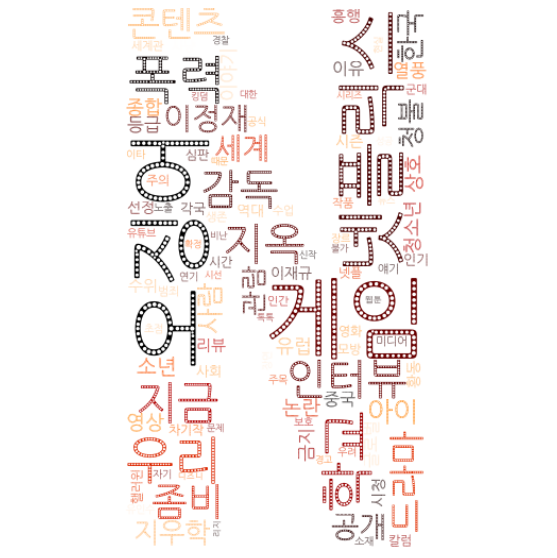

In [ ]:
img = Image.open('netflix_image.png')
img = np.array(img)

wc = WordCloud(font_path=font,
               background_color="white",
               colormap='gist_heat',
							 width=700,
							 height=700,
							 max_words=100,
							 max_font_size=300,
               mask=img)
wc.generate_from_frequencies(data)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 2.방향성에 따른 분석



## 2-1 코로나 19 사태로 인한 폭력성 등의 자극적인 미디어에 대한 수요 증가의 관점

코로나 19를 겪으며 비대면의 생활환경이 지속되어왔다. 이에 타인과의 만남과 스포츠 등의 외부 여가활동이 제한을 받으며, '코로나 블루'라는 용어가 유행하는 등 부정적인 감정이 증가하는 양상이 나타났다. 또한 이러한 비대면 환경에서 많은 사람들이 취미활동의 대안으로 OTT 플랫폼을 이용하게 되었다. 

따라서 다양한 데이터 분석을 통해 '코로나 19로 인한 감정변화'가 실제로 '넷플릭스의 폭력적 콘텐츠의 증감'과 어떠한 관련이 존재하는지 분석하고자 한다. 이에 코로나 시기 이전과 이후 국민들의 감정변화를 데이터를 통해 파악할 것이다.

데이터 목록

> **1. 코로나 19이후로 인한 감정 변화**
* 한국언론진흥재단의 '2020 코로나 19 이후 국민의 일상 변화 조사'에서 제공하는 csv 데이터. 공공데이터 포털에서 입수.

> **2. 삶의 만족도**
* 한국행정연구원, 「사회통합실태조사」에서 제공하는 xls 데이터
* 삶의 만족도는 현재 삶에 어느 정도 만족하는지에 대한 0~10점 척도의 평균값임.
* 서식과 주석이 포함된 엑셀파일이 원본으로, 수동으로 csv파일로 수정하는 과정을 거침
* 60~69세 이상과 60세 이상의 데이터가 분산되어 있어, 엑셀 => csv 수정과정 중 '60세 이상'이라는 행 하나로 통합하는 전처리 과정을 거침

> **3. 어제의 주관적 정서 경험 (행복감, 걱정, 우울감)**
* 한국행정연구원, 사회통합실태조사, 2013 ~ 2021
* 전혀 00하지 않았다 ~ 매우 00했다의 10가지 항목을 '01234' '678910'으로 묶어, 각 정서당 두 개의 컬럼으로 통합함

모든 데이터는 코로나19 시기를 기점으로 분석됨 (2020년 이전과 이후)

In [ ]:
#'코로나 19이후로 인한 감정 변화' 데이터 업로드
df_emotion = pd.read_csv('https://raw.githubusercontent.com/jieun2022/Data-Science-Team-E/main/data/%EC%BD%94%EB%A1%9C%EB%82%9819%EB%A1%9C%20%EC%9D%B8%ED%95%9C%20%EA%B0%90%EC%A0%95%20%EB%B3%80%ED%99%94.csv')

#'삶의 만족도' 데이터 업로드
df_life = pd.read_csv('https://raw.githubusercontent.com/jieun2022/Data-Science-Team-E/main/data/%E1%84%89%E1%85%A1%E1%86%B1%E1%84%8B%E1%85%B4%20%E1%84%86%E1%85%A1%E1%86%AB%E1%84%8C%E1%85%A9%E1%86%A8%E1%84%83%E1%85%A9%20%E1%84%89%E1%85%AE%E1%84%8C%E1%85%A5%E1%86%BC.csv')

#'어제의 주관적 정서 경험 (행복감, 걱정, 우울감)' 데이터 업로드
df_exp = pd.read_csv('https://raw.githubusercontent.com/jieun2022/Data-Science-Team-E/main/data/%EC%A3%BC%EA%B4%80%EC%A0%81%20%EC%A0%95%EC%84%9C%20%EA%B2%BD%ED%97%98.csv')

2.1.1 데이터 전처리

데이터 전처리: 1. 코로나 19이후로 인한 감정 변화

In [ ]:
df_emotion

,항목,증가,변화 없음,감소
0,걱정 또는 스트레스,78.0,19.0,3.0
1,불안 또는 두려움,65.4,30.2,4.4
2,짜증 또는 화,60.8,35.5,3.7
3,분노 또는 혐오,59.5,36.5,4.0
4,무기력감 또는 좌절감,52.4,43.0,4.6
5,외로움 또는 우울함,46.4,50.4,3.2
6,자긍심 또는 자부심,35.4,40.3,24.3
7,감사함 또는 안도감,29.3,46.1,24.6


In [ ]:
#직관성을 위해 컬럼명 변경 [항목] -> [감정]
df_emotion.rename(columns={df_emotion.columns[0] : '감정'}, inplace=True)
#인덱스 변경
df_emotion.set_index('감정', inplace=True)

In [ ]:
df_emotion

,증가,변화 없음,감소
감정,,,
걱정 또는 스트레스,78.0,19.0,3.0
불안 또는 두려움,65.4,30.2,4.4
짜증 또는 화,60.8,35.5,3.7
분노 또는 혐오,59.5,36.5,4.0
무기력감 또는 좌절감,52.4,43.0,4.6
외로움 또는 우울함,46.4,50.4,3.2
자긍심 또는 자부심,35.4,40.3,24.3
감사함 또는 안도감,29.3,46.1,24.6


데이터 전처리: 2. 삶의 만족도

In [ ]:
df_life

,Unnamed: 0,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전체,5.7,5.7,5.8,5.9,6.0,6.1,6.0,6.0,6.3
1,남자,5.5,5.7,5.8,5.9,6.0,6.0,5.9,6.0,6.3
2,여자,5.8,5.8,5.9,6.0,6.0,6.2,6.1,6.0,6.3
3,19-29세,5.7,5.9,5.8,6.1,6.1,6.1,6.0,6.2,6.4
4,30-39세,5.8,5.8,5.8,5.9,6.2,6.2,6.1,6.1,6.5
5,40-49세,5.7,5.7,5.8,5.8,6.0,6.2,5.9,6.1,6.4
6,50-59세,5.5,5.6,5.8,5.8,5.9,6.1,6.1,6.1,6.3
7,60세이상,5.6,5.5,5.9,5.9,5.9,5.9,5.8,5.7,6.1


In [ ]:
#불필요한 행 제거
df_life2 = df_life.drop(index=[1,2,3,4,5,6,7])
df_life2.drop(['Unnamed: 0'], axis=1, inplace = True)
df_life2

,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,5.7,5.7,5.8,5.9,6.0,6.1,6.0,6.0,6.3


In [ ]:
#행열 전환
df_life2 = df_life2.transpose()
df_life2

,0
2013,5.7
2014,5.7
2015,5.8
2016,5.9
2017,6.0
2018,6.1
2019,6.0
2020,6.0
2021,6.3


In [ ]:
#컬럼명 추가 [만족도]

df_life2.rename(columns={df_life2.columns[0] : '만족도'}, inplace=True)
df_life2

,만족도
2013,5.7
2014,5.7
2015,5.8
2016,5.9
2017,6.0
2018,6.1
2019,6.0
2020,6.0
2021,6.3


데이터 전처리: 3. 어제의 주관적 정서 경험 (행복감, 걱정, 우울감)

In [ ]:
df_exp

,구분별(1),구분별(2),시점,행복감,행복감.1,행복감.2,행복감.3,행복감.4,행복감.5,행복감.6,...,우울감.2,우울감.3,우울감.4,우울감.5,우울감.6,우울감.7,우울감.8,우울감.9,우울감.10,우울감.11
0,구분별(1),구분별(2),시점,ⓞ 전혀 행복하지 않았다 (%),① (%),② (%),③ (%),④ (%),⑤ 보통 (%),⑥ (%),...,② (%),③ (%),④ (%),⑤ 보통 (%),⑥ (%),⑦ (%),⑧ (%),⑨ (%),⑩ 매우 우울했다 (%),평균 (점)
1,전체,소계,2018,0.3,0.3,1.0,2.4,2.6,20.9,16.4,...,20.1,17.0,9.7,14.3,5.5,3.2,1.5,0.5,0.4,2.9
2,전체,소계,2019,0.4,0.8,1.3,2.4,4.0,21.7,15.5,...,16.2,13.8,11.7,18.1,8.8,5.1,2.0,0.8,0.4,3.4
3,전체,소계,2020,0.1,0.2,0.8,3.0,4.7,20.7,18.5,...,16.9,17.4,15.7,16.1,7.4,4.2,1.5,0.3,0.2,3.3
4,전체,소계,2021,0.0,0.0,0.3,1.0,3.5,15.1,19.5,...,16.6,18.1,13.3,15.1,8.1,7.5,4.4,0.8,0.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,교육정도별,고졸,2021,0.0,-,0.4,0.7,3.4,15.8,21.0,...,16.9,17.4,12.2,14.7,8.2,7.4,5.4,0.9,0.0,3.7
107,교육정도별,대졸 이상,2018,0.2,0.2,0.7,1.8,2.7,17.9,15.5,...,20.0,15.8,9.4,13.3,6.3,2.9,1.7,0.4,0.3,2.9
108,교육정도별,대졸 이상,2019,0.3,0.5,1.0,2.0,4.3,18.3,16.0,...,16.3,14.7,13.1,17.3,9.2,5.2,1.6,0.7,0.2,3.4
109,교육정도별,대졸 이상,2020,0.2,0.1,0.5,1.9,3.1,17.1,18.2,...,17.8,17.3,15.0,17.2,6.2,3.7,1.1,0.2,0.3,3.2


In [ ]:
#필요한 데이터 추출, 불필요한 행,열 제거 (전체 및 소계)
df_exp2 = df_exp.loc[[0,1,2,3,4]]
df_exp2 = df_exp2.drop(index=[0])
df_exp2.drop(['구분별(1)'], axis=1, inplace = True)
df_exp2.drop(['구분별(2)'], axis=1, inplace = True)
#인덱스 변경
df_exp2.set_index('시점', inplace=True)
df_exp2

,행복감,행복감.1,행복감.2,행복감.3,행복감.4,행복감.5,행복감.6,행복감.7,행복감.8,행복감.9,...,우울감.2,우울감.3,우울감.4,우울감.5,우울감.6,우울감.7,우울감.8,우울감.9,우울감.10,우울감.11
시점,,,,,,,,,,,,,,,,,,,,,
2018,0.3,0.3,1.0,2.4,2.6,20.9,16.4,24.5,20.6,7.1,...,20.1,17.0,9.7,14.3,5.5,3.2,1.5,0.5,0.4,2.9
2019,0.4,0.8,1.3,2.4,4.0,21.7,15.5,22.6,19.5,7.6,...,16.2,13.8,11.7,18.1,8.8,5.1,2.0,0.8,0.4,3.4
2020,0.1,0.2,0.8,3.0,4.7,20.7,18.5,27.0,18.9,4.6,...,16.9,17.4,15.7,16.1,7.4,4.2,1.5,0.3,0.2,3.3
2021,0.0,0.0,0.3,1.0,3.5,15.1,19.5,31.7,23.3,4.7,...,16.6,18.1,13.3,15.1,8.1,7.5,4.4,0.8,0.1,3.7


In [ ]:
#'보통','평균'열 제거
df_exp2.drop(columns = ['행복감.5','행복감.11', '걱정.5', '걱정.11', '우울감.5', '우울감.11'],inplace = True)
df_exp2

,행복감,행복감.1,행복감.2,행복감.3,행복감.4,행복감.6,행복감.7,행복감.8,행복감.9,행복감.10,...,우울감,우울감.1,우울감.2,우울감.3,우울감.4,우울감.6,우울감.7,우울감.8,우울감.9,우울감.10
시점,,,,,,,,,,,,,,,,,,,,,
2018,0.3,0.3,1.0,2.4,2.6,16.4,24.5,20.6,7.1,3.8,...,10.6,17.3,20.1,17.0,9.7,5.5,3.2,1.5,0.5,0.4
2019,0.4,0.8,1.3,2.4,4.0,15.5,22.6,19.5,7.6,4.2,...,10.4,12.8,16.2,13.8,11.7,8.8,5.1,2.0,0.8,0.4
2020,0.1,0.2,0.8,3.0,4.7,18.5,27.0,18.9,4.6,1.5,...,9.0,11.4,16.9,17.4,15.7,7.4,4.2,1.5,0.3,0.2
2021,0.0,0.0,0.3,1.0,3.5,19.5,31.7,23.3,4.7,0.7,...,5.0,10.9,16.6,18.1,13.3,8.1,7.5,4.4,0.8,0.1


In [ ]:
#데이터타입을 float형으로 변환
df_exp2= df_exp2.astype(dtype='float',errors='ignore')

In [ ]:
#전혀 00하지 않았다 ~ 매우 00했다의 10가지 항목을 '01234' '678910'으로 묶어, 각 정서당 두 개의 컬럼으로 통합
df_exp2['행복X'] = df_exp2['행복감'] + df_exp2['행복감.1'] + df_exp2['행복감.2'] + df_exp2['행복감.3']  + df_exp2['행복감.4']
df_exp2['행복O'] = df_exp2['행복감.6'] + df_exp2['행복감.7'] + df_exp2['행복감.8']  + df_exp2['행복감.9'] + df_exp2['행복감.10']
df_exp2['걱정X'] = df_exp2['걱정'] + df_exp2['걱정.1'] + df_exp2['걱정.2'] + df_exp2['걱정.3']  + df_exp2['걱정.4']
df_exp2['걱정O'] = df_exp2['걱정.6'] + df_exp2['걱정.7'] + df_exp2['걱정.8']  + df_exp2['걱정.9'] + df_exp2['걱정.10']
df_exp2['우울감X'] = df_exp2['우울감'] + df_exp2['우울감.1'] + df_exp2['우울감.2'] + df_exp2['우울감.3']  + df_exp2['우울감.4']
df_exp2['우울감O'] = df_exp2['우울감.6'] + df_exp2['우울감.7'] + df_exp2['우울감.8']  + df_exp2['우울감.9'] + df_exp2['우울감.10']
df_exp2

,행복감,행복감.1,행복감.2,행복감.3,행복감.4,행복감.6,행복감.7,행복감.8,행복감.9,행복감.10,...,우울감.7,우울감.8,우울감.9,우울감.10,행복X,행복O,걱정X,걱정O,우울감X,우울감O
시점,,,,,,,,,,,,,,,,,,,,,
2018,0.3,0.3,1.0,2.4,2.6,16.4,24.5,20.6,7.1,3.8,...,3.2,1.5,0.5,0.4,6.6,72.4,61.4,18.8,74.7,11.1
2019,0.4,0.8,1.3,2.4,4.0,15.5,22.6,19.5,7.6,4.2,...,5.1,2.0,0.8,0.4,8.9,69.4,50.8,27.4,64.9,17.1
2020,0.1,0.2,0.8,3.0,4.7,18.5,27.0,18.9,4.6,1.5,...,4.2,1.5,0.3,0.2,8.8,70.5,55.7,23.6,70.4,13.6
2021,0.0,0.0,0.3,1.0,3.5,19.5,31.7,23.3,4.7,0.7,...,7.5,4.4,0.8,0.1,4.8,79.9,53.0,29.6,63.9,20.9


In [ ]:
#통합된 데이터만 추출
df_exp3 = df_exp2[['행복X','행복O','걱정X','걱정O','우울감X','우울감O']]
df_exp3

,행복X,행복O,걱정X,걱정O,우울감X,우울감O
시점,,,,,,
2018,6.6,72.4,61.4,18.8,74.7,11.1
2019,8.9,69.4,50.8,27.4,64.9,17.1
2020,8.8,70.5,55.7,23.6,70.4,13.6
2021,4.8,79.9,53.0,29.6,63.9,20.9


2.1.2 데이터 시각화

데이터 시각화: 1. 코로나 19이후로 인한 감정 변화

In [ ]:
import numpy as np
plt.rcParams["figure.figsize"] = (20, 15)

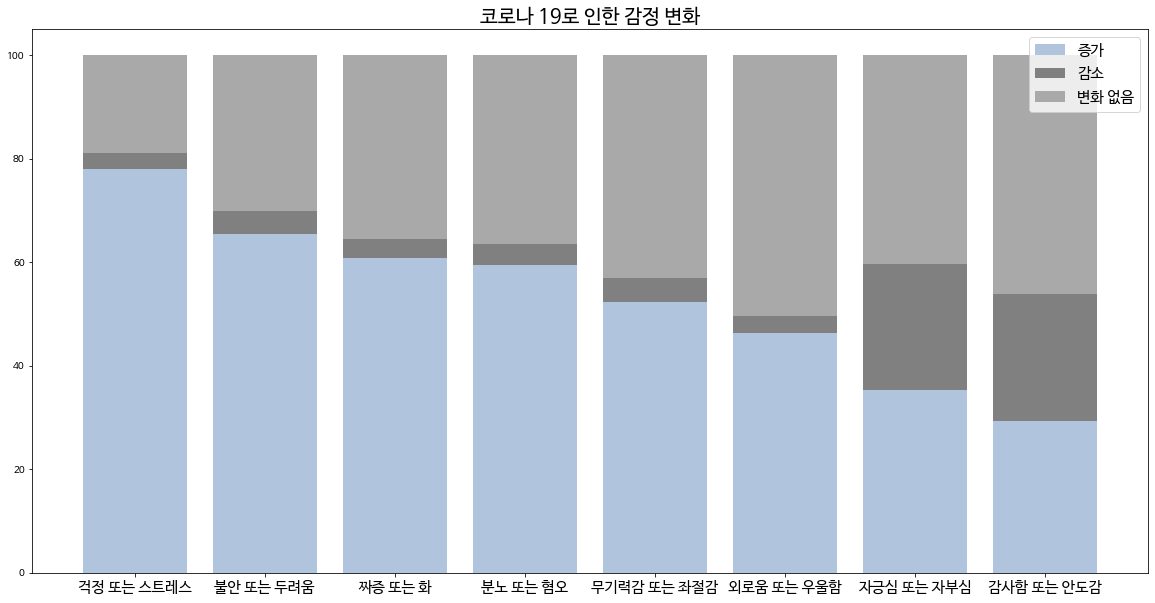

In [ ]:
#전체 100%의 누적 막대 차트를 통해 '코로나 19로 인한 감정변화' 데이터 시각화


x_label = df_emotion.index
x = np.arange(len(x_label))
y_1 = df_emotion['증가']
y_2 = df_emotion['감소']
y_3 = df_emotion['변화 없음']

fig, axes = plt.subplots(figsize=(20,10))

a_bottom = np.add(y_1, y_2)

axes.bar(x, y_1, color = 'lightsteelblue')
axes.bar(x, y_2, bottom = y_1, color = 'gray')
axes.bar(x, y_3, bottom = a_bottom, color = 'darkgray')

plt.xticks(x)
axes.set_xticklabels(x_label, fontsize=15)
plt.title('코로나 19로 인한 감정 변화', fontsize=20)

plt.legend(['증가', '감소', '변화 없음'],fontsize=15)
plt.show()

데이터 시각화: 2. 삶의 만족도

In [ ]:
df_life2

,만족도
2013,5.7
2014,5.7
2015,5.8
2016,5.9
2017,6.0
2018,6.1
2019,6.0
2020,6.0
2021,6.3


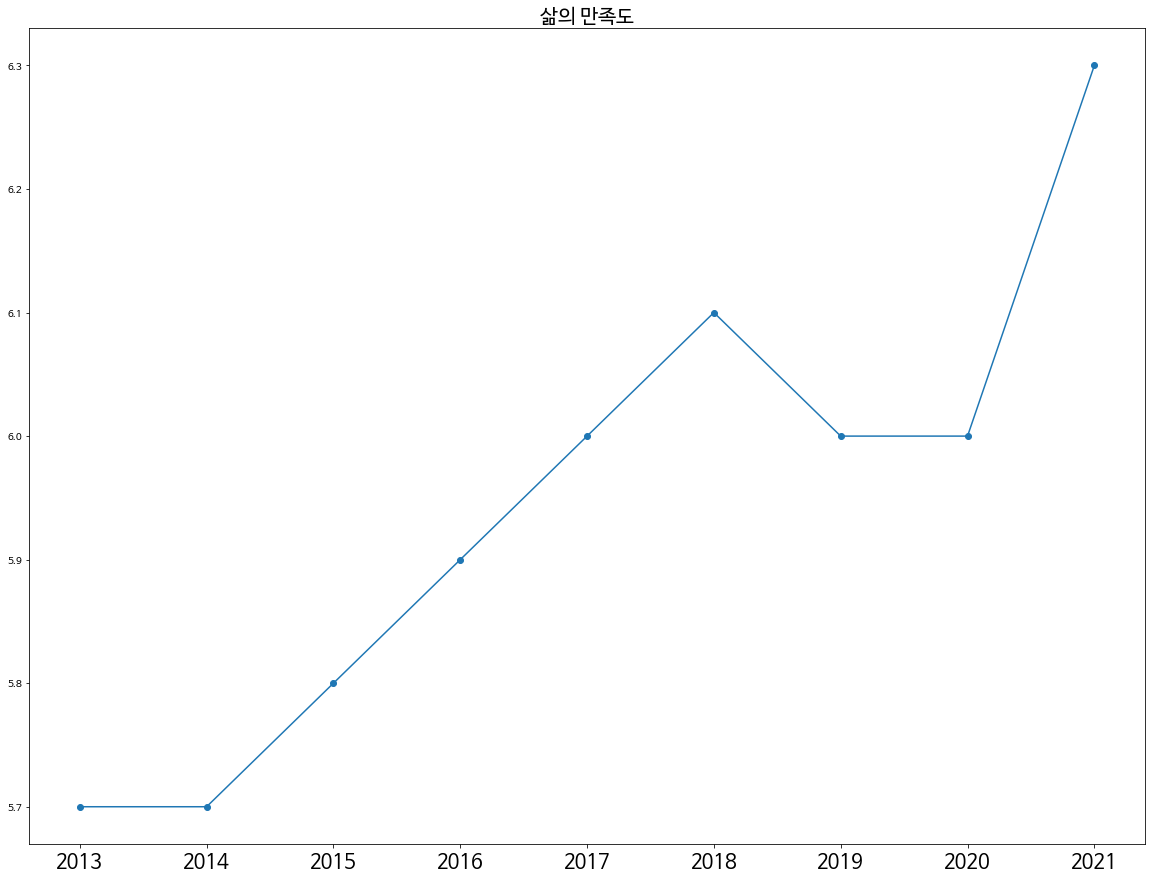

In [ ]:
# lineplot을 통해 '삶의 만족도' 데이터 시각화

x = df_life2.index
y = df_life2['만족도']

plt.plot(x, y,marker = 'o')
plt.xticks(fontsize=20)
plt.title('삶의 만족도', fontsize=20)

plt.show()

데이터 시각화: 3. 어제의 주관적 정서 경험 (행복감, 걱정, 우울감)

In [ ]:
df_exp3

,행복X,행복O,걱정X,걱정O,우울감X,우울감O
시점,,,,,,
2018,6.6,72.4,61.4,18.8,74.7,11.1
2019,8.9,69.4,50.8,27.4,64.9,17.1
2020,8.8,70.5,55.7,23.6,70.4,13.6
2021,4.8,79.9,53.0,29.6,63.9,20.9


In [ ]:
plt.rcParams["figure.figsize"] = (5, 4)

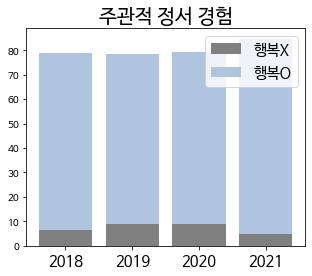

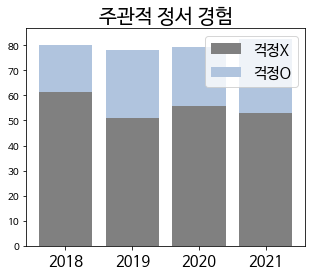

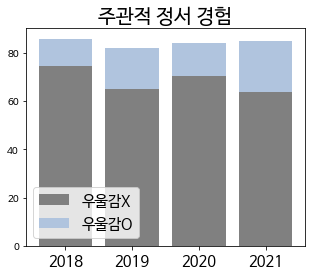

In [ ]:
#전체 100%의 누적 막대 차트를 통해 '어제의 주관적 정서 경험 (행복감, 걱정, 우울감)' 데이터 시각화

# 1: 행복감 데이터
x_label = df_exp3.index
x = np.arange(len(x_label))
y_1 = df_exp3['행복X']
y_2 = df_exp3['행복O']

fig, axes = plt.subplots()

a_bottom = np.add(y_1, y_2)

axes.bar(x, y_1, color = 'gray')
axes.bar(x, y_2, bottom = y_1, color = 'lightsteelblue')

plt.xticks(x)
axes.set_xticklabels(x_label, fontsize=15)
plt.title('주관적 정서 경험', fontsize=20)

plt.legend(['행복X', '행복O'],fontsize=15)

plt.show()

# 2: 걱정 데이터
x_label2 = df_exp3.index
x = np.arange(len(x_label))
y_3 = df_exp3['걱정X']
y_4 = df_exp3['걱정O']

fig, axes = plt.subplots()

a_bottom = np.add(y_3, y_4)

axes.bar(x, y_3, color = 'gray')
axes.bar(x, y_4, bottom = y_3, color = 'lightsteelblue')

plt.xticks(x)
axes.set_xticklabels(x_label, fontsize=15)
plt.title('주관적 정서 경험', fontsize=20)

plt.legend(['걱정X', '걱정O'],fontsize=15)

plt.show()

# 3: 우울감 데이터
x_label3 = df_exp3.index
x = np.arange(len(x_label))
y_5 = df_exp3['우울감X']
y_6 = df_exp3['우울감O']

fig, axes = plt.subplots()

a_bottom = np.add(y_5, y_6)

axes.bar(x, y_5, color = 'gray')
axes.bar(x, y_6, bottom = y_5, color = 'lightsteelblue')

plt.xticks(x)
axes.set_xticklabels(x_label, fontsize=15)
plt.title('주관적 정서 경험', fontsize=20)

plt.legend(['우울감X', '우울감O'],fontsize=15)

plt.show()

## 2-2 미디어 세대의 도래에 따른 자극적인 콘텐츠 수요 증가의 관점

비디오: 연속적인 영상이 테이프 또는 디스크 같은 디지털 매체에 담겨있거나 정보통신망을 통해 볼 수 있고 들을 수 있도록 제작된 것
- DVD, 블루레이 등 일반적인 비디오 매체 뿐만 아니라 인터넷, 스마트폰 등으로 제공되는 VOD 서비스

In [ ]:
ry_video = pd.read_csv('https://raw.githubusercontent.com/jieun2022/Data-Science-Team-E/main/data/ry_video.csv')
ry_video

,년도,전체 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,제한 상영가,등급 소계,속행,자료제출,기타,계
0,2017,1437,849,1453,4450,0,8189,0,1039,0,9228
1,2018,1146,646,1274,3759,0,6825,0,999,0,7824
2,2019,1685,544,1327,3068,0,6624,226,931,0,7781
3,2020,2964,766,1299,2927,0,7956,349,785,0,9090
4,2021,5823,1651,2005,2099,17,11595,275,485,0,12355


In [ ]:
v_ya = ry_video[['년도','전체 관람가','12세이상 관람가','15세이상 관람가','청소년 관람불가','제한 상영가']]
v_ya

,년도,전체 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,제한 상영가
0,2017,1437,849,1453,4450,0
1,2018,1146,646,1274,3759,0
2,2019,1685,544,1327,3068,0
3,2020,2964,766,1299,2927,0
4,2021,5823,1651,2005,2099,17


<Figure size 1080x576 with 0 Axes>

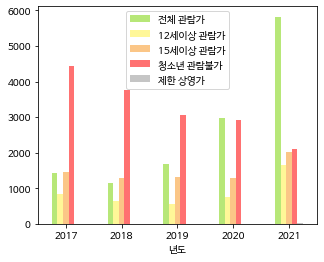

<Figure size 1080x576 with 0 Axes>

In [ ]:
kv_df = pd.DataFrame({'년도': [2017, 2018, 2019, 2020, 2021],
                   '전체 관람가': [1437, 1146, 1685, 2964, 5823],
                   '12세이상 관람가': [849, 646, 544, 766, 1651],
                   '15세이상 관람가': [1453, 1274, 1327, 1299, 2005],
                   '청소년 관람불가': [4450,3759,3068,2927,2099],
                   '제한 상영가': [0,0,0,0,17]})

kv_df[['년도', '전체 관람가', '12세이상 관람가', '15세이상 관람가', '청소년 관람불가', '제한 상영가']].plot(x='년도', kind='bar', color=['#B7E778', '#FFF798', '#FBC687', '#FF7171', '#C5C5C5'], rot=0)
plt.figure(figsize=(15, 8))

한국 비디오물의 연도별 관람 등급을 보았을 때, 2021년의 전체 관람가 콘텐츠가 폭발적으로 증가하였다는 것을 알 수 있다. 또한 12세이상 콘텐츠, 15세이상 콘텐츠, 제한 상영가 콘텐츠도 증가하고 있음을 알 수 있다. 반면, 청소년 관람불가 콘텐츠는 오히려 줄어든 것으로 보인다.

# 3.넷플릭스 Top10 관람등급 분석 - 2019~2021의 자료 기준

In [ ]:
netflix2019 = pd.read_csv('https://raw.githubusercontent.com/jieun2022/Data-Science-Team-E/main/data/netflix_top10_2019.csv')
netflix2020 = pd.read_csv('https://raw.githubusercontent.com/jieun2022/Data-Science-Team-E/main/data/netflix_top10_2020.csv')
netflix2021 = pd.read_csv('https://raw.githubusercontent.com/jieun2022/Data-Science-Team-E/main/data/netflix_top10_2021.csv')

In [ ]:
netflix2019

,순위,제목,입점일,관람등급,장르
0,1,Kingdom,2019,청소년 관람불가,공포
1,2,6 Underground,2019,청소년 관람불가,액션/스릴러
2,3,The Witcher,2019,청소년 관람불가,판타지
3,4,Crash Landing on You,2019,15세이상 관람가,로맨스
4,5,Park Na-rae: Glamour Warning,2019,청소년 관람불가,스탠드업 코미디
5,6,Persona,2019,청소년 관람불가,선집시리즈
6,7,When the Camellia Blooms,2019,15세이상 관람가,드라마
7,8,Love Alarm,2019,15세이상 관람가,로맨틱 코미디
8,9,Stranger Things,2019,15세이상 관람가,드라마
9,10,Vagabond,2019,청소년 관람불가,로맨스


In [ ]:
# 'year' column 추가
netflix2019['year'] = 2019
netflix2019 = netflix2019.set_index("year")
netflix2019

,순위,제목,입점일,관람등급,장르
year,,,,,
2019,1,Kingdom,2019,청소년 관람불가,공포
2019,2,6 Underground,2019,청소년 관람불가,액션/스릴러
2019,3,The Witcher,2019,청소년 관람불가,판타지
2019,4,Crash Landing on You,2019,15세이상 관람가,로맨스
2019,5,Park Na-rae: Glamour Warning,2019,청소년 관람불가,스탠드업 코미디
2019,6,Persona,2019,청소년 관람불가,선집시리즈
2019,7,When the Camellia Blooms,2019,15세이상 관람가,드라마
2019,8,Love Alarm,2019,15세이상 관람가,로맨틱 코미디
2019,9,Stranger Things,2019,15세이상 관람가,드라마


In [ ]:
netflix2020['year'] = 2020
netflix2020 = netflix2020.set_index("year")
netflix2020

,순위,제목,입점일,관람등급,장르
year,,,,,
2020,1,365 Days,2020,청소년 관람불가,로맨스/드라마
2020,2,Honest Candidate,2020,12세이상 관람가,코미디
2020,3,Howls Moving Castle,2020,전체 관람가,판타지/어린이
2020,4,Extraction,2020,청소년 관람불가,액션/스릴러
2020,5,The Call,2020,15세이상 관람가,스릴러/미스터리
2020,6,Peninsula,2020,15세이상 관람가,액션/스릴러
2020,7,#Alive \t,2020,15세이상 관람가,스릴러/드라마
2020,8,Enola Holmes,2020,12세이상 관람가,미스터리/범죄
2020,9,Time to Hunt,2020,15세이상 관람가,범죄/드라마


In [ ]:
netflix2021['year'] = 2021
netflix2021 = netflix2021.set_index("year")
netflix2021

,순위,제목,입점일,관람등급,장르
year,,,,,
2021,1,365 Days,2020,청소년 관람불가,로맨스/드라마
2021,2,Kingdom,2019,청소년 관람불가,공포/스릴러
2021,3,Night in Paradise,2021,청소년 관람불가,드라마
2021,4,Space Sweepers,2021,12세이상 관람가,SF/스페이스 오페라
2021,5,Demon Slayer: Kimetsu no Yaiba,2021,15세이상 관람가,애니메이션
2021,6,Sinkhole,2021,12세이상 관람가,코미디/드라마
2021,7,Sweet & Sour,2021,15세이상 관람가,로맨스
2021,8,Red Notice,2021,15세이상 관람가,액션/코미디
2021,9,Parasite,2021,15세이상 관람가,스릴러/드라마


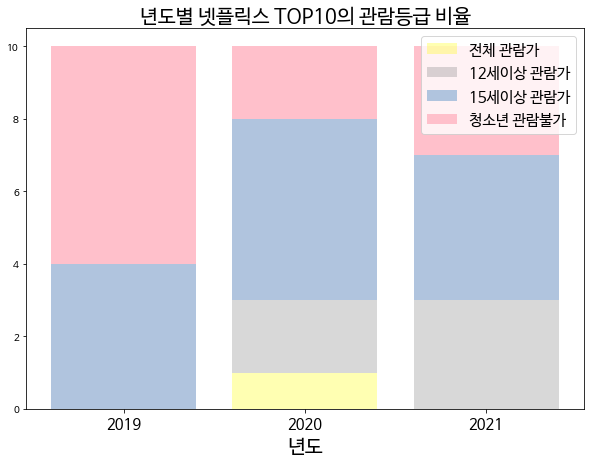

In [ ]:
#누적 그래프를 이용한 데이터 시각화

plt.rcParams["figure.figsize"] = (10, 7)


x_label = level_df.index
x = np.arange(len(x_label))
y_1 = level_df['전체 관람가']
y_2 = level_df['12세이상 관람가']
y_3 = level_df['15세이상 관람가']
y_4 = level_df['청소년 관람불가']

fig, axes = plt.subplots()

a_bottom = np.add(y_1, y_2)
b_bottom = np.add(a_bottom, y_3)

axes.bar(x, y_1, color = 'yellow', alpha = 0.3)
axes.bar(x, y_2, bottom = y_1, color = 'gray', alpha = 0.3)
axes.bar(x, y_3, bottom = a_bottom, color = 'lightsteelblue')
axes.bar(x, y_4, bottom = b_bottom, color ='pink')

plt.xticks(x)
axes.set_xticklabels(x_label, fontsize=15)
plt.title('년도별 넷플릭스 TOP10의 관람등급 비율', fontsize=20)

plt.legend(['전체 관람가', '12세이상 관람가', '15세이상 관람가', '청소년 관람불가'],fontsize=15)

axes.set_xlabel("년도", fontsize = 20)

plt.show()

# 4.결론: 방향성 데이터와 넷플릭스 데이터의 연관성

## 4-1 넷플릭스와 코로나19 감정변화 데이터의 연관성


데이터 전처리

In [ ]:
#넷플릭스 데이터의 인덱스를 '년도'로 재설정
net_exp = yr1721.set_index('년도')
#넷플릭스 데이터 '청소년 관람불가' 항목의 비율 컬럼을 추가
net_exp['청불 비율 (%)'] = net_exp['청소년 관람불가'] / (net_exp['전체 관람가'] +	net_exp['7세이상 관람가'] +	net_exp['12세이상 관람가'] + net_exp['15세이상 관람가'] + net_exp['청소년 관람불가']) * 100

In [ ]:
net_exp

,전체 관람가,7세이상 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,청불 비율 (%)
년도,,,,,,
2017,62,233,26,326,513,44.224138
2018,88,263,53,451,779,47.674419
2019,102,334,135,494,945,47.014925
2020,172,287,122,439,859,45.715806
2021,105,242,146,326,679,45.327103


In [ ]:
#넷플릭스 top10 데이터의 타입을 float형으로 변환
level_df2= level_df.astype(dtype='float',errors='ignore')
#넷플릭스 top10 데이터 '청소년 관람불가' 항목의 비율 컬럼을 추가
level_df2['청불 비율 (%)'] = level_df2['청소년 관람불가'] / (level_df2['전체 관람가'] +	level_df2['12세이상 관람가'] + level_df2['15세이상 관람가'] + level_df2['청소년 관람불가']) * 100
level_df2

,전체 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,청불 비율 (%)
2019,0.0,0.0,4.0,6.0,60.0
2020,1.0,2.0,5.0,2.0,20.0
2021,0.0,3.0,4.0,3.0,30.0


### 데이터 연관성: 1. 코로나 19이후로 인한 감정 변화

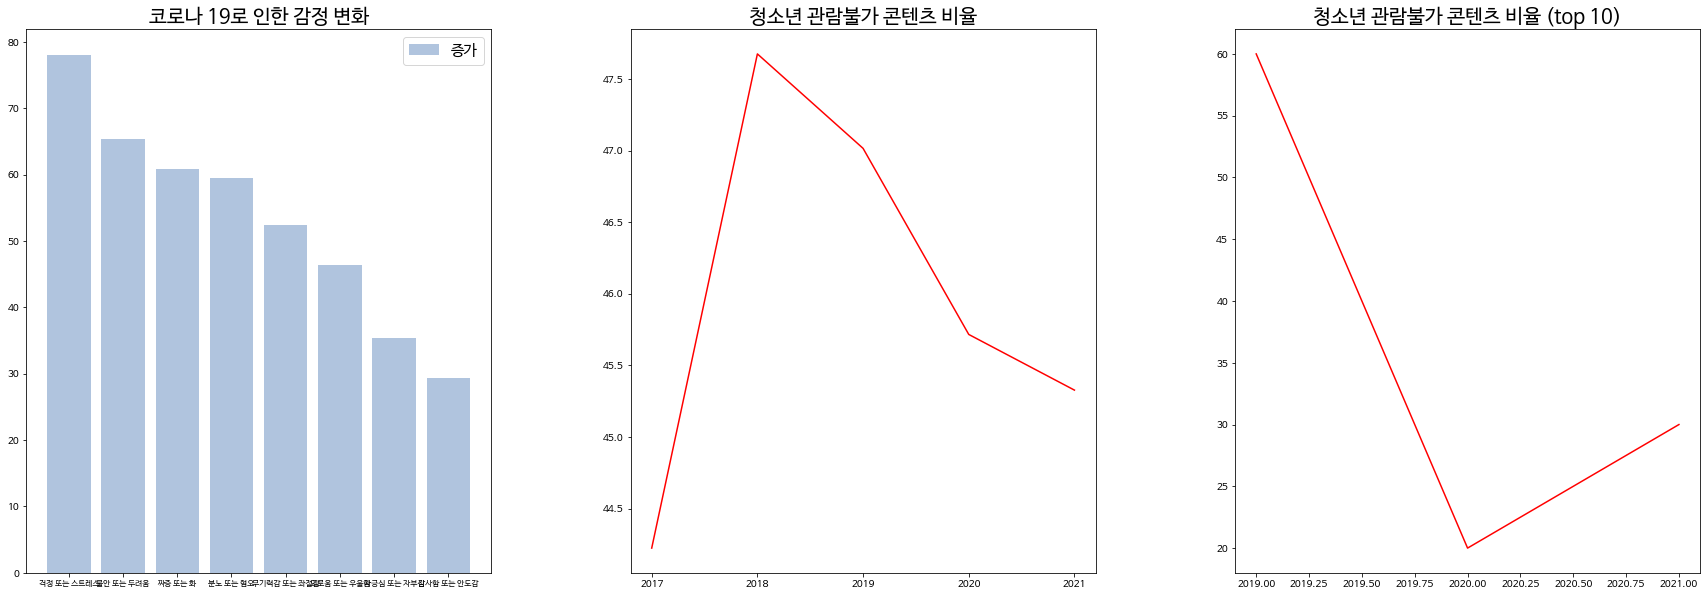

In [ ]:
f, axes = plt.subplots(1, 3)
f.set_size_inches((30, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

x_label = df_emotion.index
x = np.arange(len(x_label))
y_1 = df_emotion['증가']


axes[0].bar(x, y_1, color = 'lightsteelblue')
axes[0].set_xticks(x)
axes[0].set_xticklabels(x_label, fontsize=8)
axes[0].set_title('코로나 19로 인한 감정 변화', fontsize = 20)
axes[0].legend(['증가'],fontsize=15)


x_2 = net_exp.index
y_2 = net_exp['청불 비율 (%)']
axes[1].plot(x_2, y_2, color = 'red')
axes[1].set_title('청소년 관람불가 콘텐츠 비율', fontsize = 20)

x_3 = level_df2.index
y_3 = level_df2['청불 비율 (%)']
axes[2].plot(x_3, y_3, color = 'red')
axes[2].set_title('청소년 관람불가 콘텐츠 비율 (top 10)', fontsize = 20)

plt.show()

**코로나 19로 인한 감정변화 데이터와 넷플릭스 데이터**

*'자긍심 또는 자부심'과 '감사함 또는 안도감'은 긍정적 감정으로 간주, 그 외 지표들은 부정적 감정으로 간주*
> 코로나 19 이후 긍정적 감정에 비하여, 부정적 감정의 '증가' 비율이 두드러짐

> 코로나19 이전과 이후, 청소년 관람불가 콘텐츠의 비율은 대체로 낮아짐 

> 조사의 전과 후인 2019과 2020년, 즉 부정적인 감정이 상승되는 시기에, 청소년 관람불가 콘텐츠의 비율이 하락함.

> 해석1: 부정적 감정이 증가할수록, 코로나 19로 인한 두려움이 상승하는 상황에서 사람들은 자극적이지 않은 콘텐츠를 통해 불안감에서 회피하려고 하나?

> 해석2: 두 데이터 간의 관계는 유의미하지 않아보이며, 청소년 관람불가 콘텐츠 비율의 하락 인자는 시청 연령대의 확장, 키즈 콘텐츠의 유입 등으로 예상됨



### 데이터 연관성: 2. 삶의 만족도

데이터 전처리

In [ ]:
df_life2

,만족도
2013,5.7
2014,5.7
2015,5.8
2016,5.9
2017,6.0
2018,6.1
2019,6.0
2020,6.0
2021,6.3


In [ ]:
net_exp

,전체 관람가,7세이상 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,청불 비율 (%)
년도,,,,,,
2017,62,233,26,326,513,44.224138
2018,88,263,53,451,779,47.674419
2019,102,334,135,494,945,47.014925
2020,172,287,122,439,859,45.715806
2021,105,242,146,326,679,45.327103


In [ ]:
level_df2

,전체 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,청불 비율 (%)
2019,0.0,0.0,4.0,6.0,60.0
2020,1.0,2.0,5.0,2.0,20.0
2021,0.0,3.0,4.0,3.0,30.0


In [ ]:
# 넷플릭스 데이터와 교집합이 아닌 행을 제거
df_life3 = df_life2.drop(index=['2013','2014','2015','2016'])
df_life3

,만족도
2017,6.0
2018,6.1
2019,6.0
2020,6.0
2021,6.3


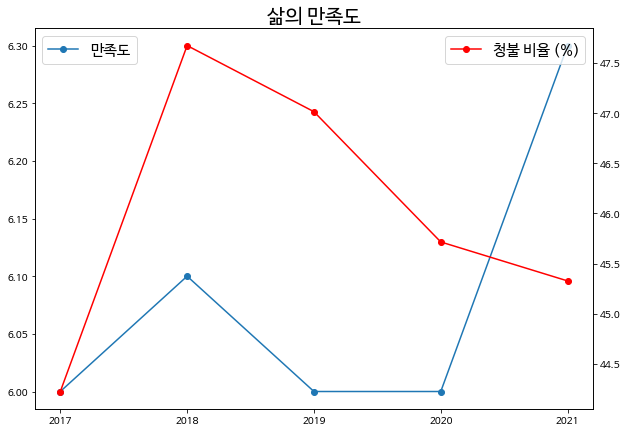

In [ ]:
# 1: 삶의 만족도 데이터와 넷플릭스 데이터

fig, axes = plt.subplots()

x = df_life3.index
y = df_life3['만족도']
y_n = net_exp['청불 비율 (%)']


axes.plot(x, y,marker = 'o')
axes2 = axes.twinx()
axes2.plot(x, y_n, color = 'red', marker = 'o')


plt.xticks(fontsize=20)
plt.title('삶의 만족도', fontsize=20)


plt.legend(['청불 비율 (%)'],fontsize=15)
axes.legend(['만족도'],fontsize=15, loc=2)


plt.show()

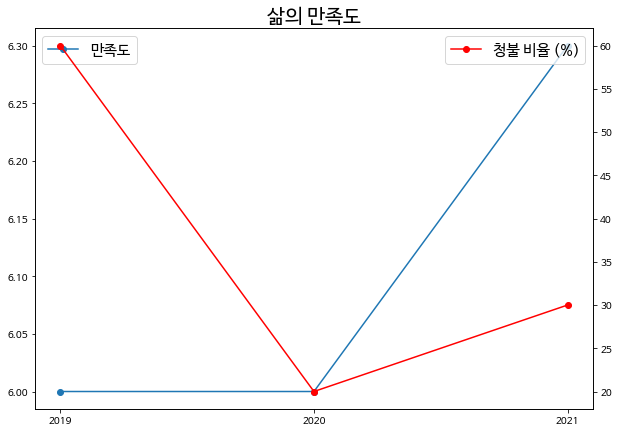

In [ ]:
# 2: 삶의 만족도 데이터와 넷플릭스 top10 데이터

# 넷플릭스 top10 데이터와 교집합이 아닌 행을 제거
df_life10 = df_life2.drop(index=['2013','2014','2015','2016','2017','2018'])

fig, axes = plt.subplots()

x = df_life10.index
y = df_life10['만족도']
y_n = level_df2['청불 비율 (%)']


axes.plot(x, y,marker = 'o')
axes2 = axes.twinx()
axes2.plot(x, y_n, color = 'red', marker = 'o')


plt.xticks(fontsize=20)
plt.title('삶의 만족도', fontsize=20)


plt.legend(['청불 비율 (%)'],fontsize=15)
axes.legend(['만족도'],fontsize=15, loc=2)


plt.show()

**삶의 만족도와 넷플릭스 데이터**


> 코로나19 이전과 이후, 청소년 관람불가 콘텐츠의 비율은 대체로 낮아짐 

> 2021년도를 제외, 삶의 만족도와 자극적인 콘텐츠의 상승은 정비례의 관계를 지니는 경향이 있음

> 혹은 코로나 19로 인한 두려움이 상승하는 상황에서 사람들은 자극적이지 않은 콘텐츠를 통해 불안감에서 회피하려고 하나?

> 두 데이터 간의 관계는 유의미하지 않아보이며, 청소년 관람불가 콘텐츠 비율의 하락 인자는 시청 연령대의 확장, 키즈 콘텐츠의 유입 등으로 예상됨



### 데이터 연관성: 3. 주관적 정서 경험 (행복감, 걱정, 우울감)

데이터 전처리

In [ ]:
df_exp3

,행복X,행복O,걱정X,걱정O,우울감X,우울감O
시점,,,,,,
2018,6.6,72.4,61.4,18.8,74.7,11.1
2019,8.9,69.4,50.8,27.4,64.9,17.1
2020,8.8,70.5,55.7,23.6,70.4,13.6
2021,4.8,79.9,53.0,29.6,63.9,20.9


In [ ]:
net_exp

,전체 관람가,7세이상 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,청불 비율 (%)
년도,,,,,,
2017,62,233,26,326,513,44.224138
2018,88,263,53,451,779,47.674419
2019,102,334,135,494,945,47.014925
2020,172,287,122,439,859,45.715806
2021,105,242,146,326,679,45.327103


In [ ]:
level_df

,전체 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가
2019,0,0,4,6
2020,1,2,5,2
2021,0,3,4,3


In [ ]:
#두 데이터의 교집합에 해당되는 연도를 남기고 행을 제거함
net_exp = net_exp.drop(index=['2017'])
net_exp

,전체 관람가,7세이상 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,청불 비율 (%)
년도,,,,,,
2018,88,263,53,451,779,47.674419
2019,102,334,135,494,945,47.014925
2020,172,287,122,439,859,45.715806
2021,105,242,146,326,679,45.327103


시각화 및 비교

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 12

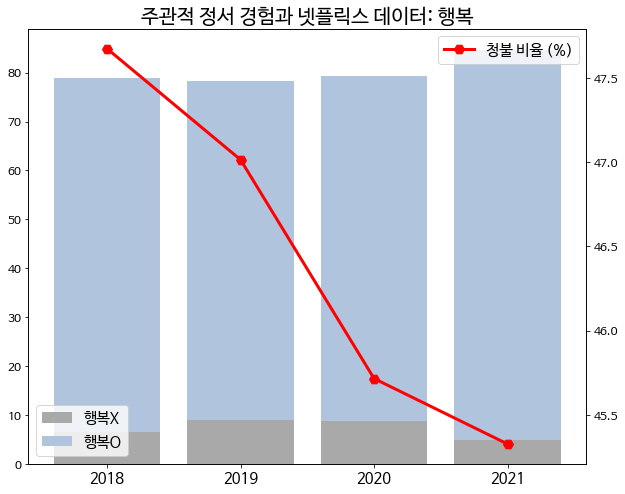

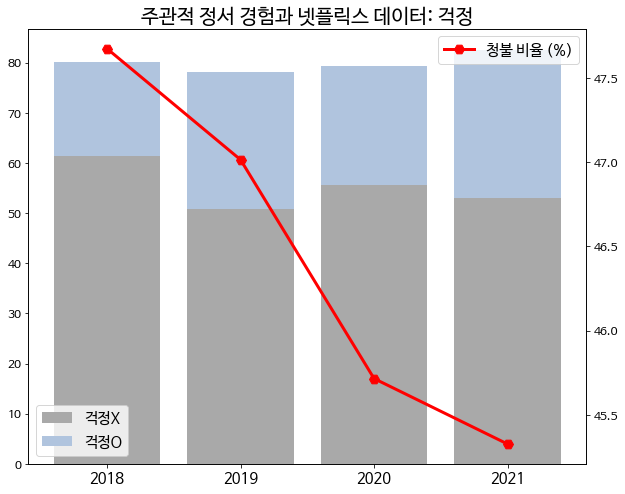

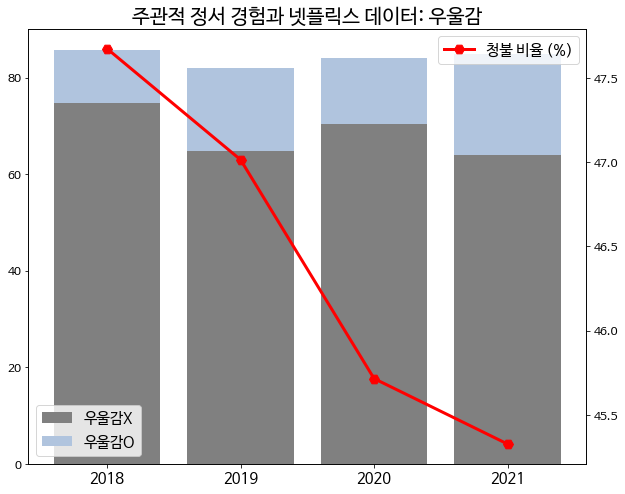

In [ ]:
# 1: 행복감 데이터와 넷플릭스 데이터
x_label = df_exp3.index
x = np.arange(len(x_label))
y_1 = df_exp3['행복X']
y_2 = df_exp3['행복O']
y_n = net_exp['청불 비율 (%)']

fig, axes = plt.subplots()

a_bottom = np.add(y_1, y_2)

# twinx를 통해 두 그래프를 함께 표현

axes.bar(x, y_1, color = 'darkgray')
axes.bar(x, y_2, bottom = y_1, color = 'lightsteelblue')
axes2 = axes.twinx()
axes2.plot(x, y_n, color = 'red', marker="H", linewidth = 3, markersize = 10)

plt.xticks(x)
axes.set_xticklabels(x_label, fontsize=15)
plt.title('주관적 정서 경험과 넷플릭스 데이터: 행복', fontsize=20)

plt.legend(['청불 비율 (%)'],fontsize=15)
axes.legend(['행복X', '행복O'],fontsize=15, loc=3)

plt.show()


# 2: 걱정 데이터와 넷플릭스 데이터
x_label = df_exp3.index
x = np.arange(len(x_label))
y_1 = df_exp3['걱정X']
y_2 = df_exp3['걱정O']
y_n = net_exp['청불 비율 (%)']

fig, axes = plt.subplots()

a_bottom = np.add(y_1, y_2)

# twinx를 통해 두 그래프를 함께 표현

axes.bar(x, y_1, color = 'darkgray')
axes.bar(x, y_2, bottom = y_1, color = 'lightsteelblue')
axes2 = axes.twinx()
axes2.plot(x, y_n, color = 'red', marker="H", linewidth = 3, markersize = 10)

plt.xticks(x)
axes.set_xticklabels(x_label, fontsize=15)
plt.title('주관적 정서 경험과 넷플릭스 데이터: 걱정', fontsize=20)

plt.legend(['청불 비율 (%)'],fontsize=15)
axes.legend(['걱정X', '걱정O'],fontsize=15, loc=3)

plt.show()


# 3: 우울감 데이터와 넷플릭스 데이터
x_label = df_exp3.index
x = np.arange(len(x_label))
y_1 = df_exp3['우울감X']
y_2 = df_exp3['우울감O']
y_n = net_exp['청불 비율 (%)']

fig, axes = plt.subplots()

a_bottom = np.add(y_1, y_2)

# twinx를 통해 두 그래프를 함께 표현

axes.bar(x, y_1, color = 'gray')
axes.bar(x, y_2, bottom = y_1, color = 'lightsteelblue')
axes2 = axes.twinx()
axes2.plot(x, y_n, color = 'red', marker="H", linewidth = 3, markersize = 10)

plt.xticks(x)
axes.set_xticklabels(x_label, fontsize=15)
plt.title('주관적 정서 경험과 넷플릭스 데이터: 우울감', fontsize=20)

plt.legend(['청불 비율 (%)'],fontsize=15)
axes.legend(['우울감X', '우울감O'],fontsize=15, loc=3)

plt.show()

In [ ]:
#두 데이터의 교집합에 해당되는 연도를 남기고 행을 제거함
df_exp4 = df_exp3.drop(index=['2018'])
df_exp4

,행복X,행복O,걱정X,걱정O,우울감X,우울감O
시점,,,,,,
2019,8.9,69.4,50.8,27.4,64.9,17.1
2020,8.8,70.5,55.7,23.6,70.4,13.6
2021,4.8,79.9,53.0,29.6,63.9,20.9


In [ ]:
level_df2

,전체 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,청불 비율 (%)
2019,0.0,0.0,4.0,6.0,60.0
2020,1.0,2.0,5.0,2.0,20.0
2021,0.0,3.0,4.0,3.0,30.0


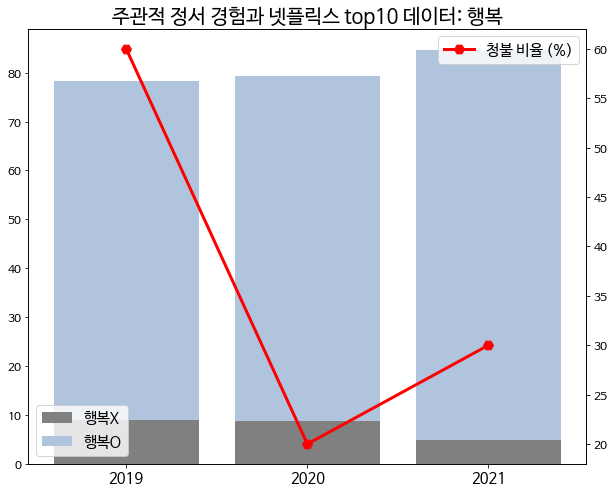

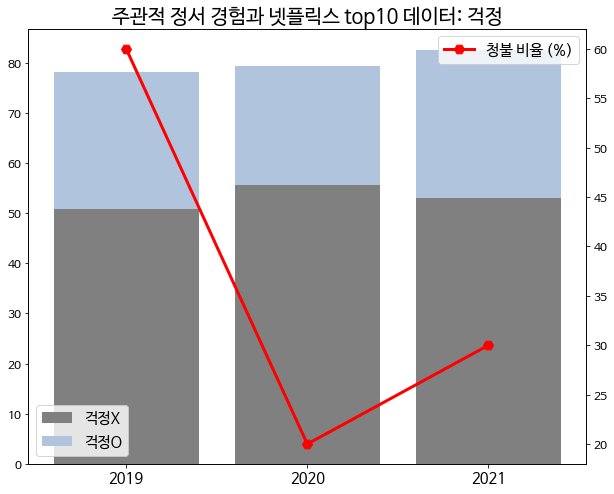

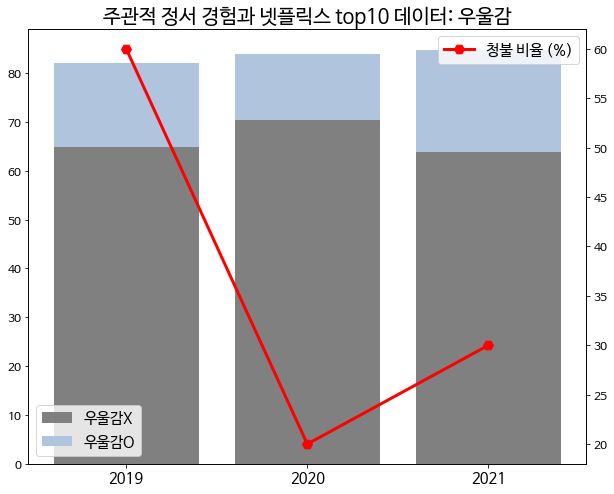

In [ ]:
# 1: 행복 데이터와 넷플릭스 top10 데이터
x_label = df_exp4.index
x = np.arange(len(x_label))
y_1 = df_exp4['행복X']
y_2 = df_exp4['행복O']
y_n = level_df2['청불 비율 (%)']

fig, axes = plt.subplots()

a_bottom = np.add(y_1, y_2)

# twinx를 통해 두 그래프를 함께 표현

axes.bar(x, y_1, color = 'gray')
axes.bar(x, y_2, bottom = y_1, color = 'lightsteelblue')
axes2 = axes.twinx()
axes2.plot(x, y_n, color = 'red', marker="H", linewidth = 3, markersize = 10)

plt.xticks(x)
axes.set_xticklabels(x_label, fontsize=15)
plt.title('주관적 정서 경험과 넷플릭스 top10 데이터: 행복', fontsize=20)

plt.legend(['청불 비율 (%)'],fontsize=15)
axes.legend(['행복X', '행복O'],fontsize=15, loc=3)

plt.show()


# 2: 걱정 데이터와 넷플릭스 top10 데이터
x_label = df_exp4.index
x = np.arange(len(x_label))
y_1 = df_exp4['걱정X']
y_2 = df_exp4['걱정O']
y_n = level_df2['청불 비율 (%)']

fig, axes = plt.subplots()

a_bottom = np.add(y_1, y_2)

# twinx를 통해 두 그래프를 함께 표현

axes.bar(x, y_1, color = 'gray')
axes.bar(x, y_2, bottom = y_1, color = 'lightsteelblue')
axes2 = axes.twinx()
axes2.plot(x, y_n, color = 'red', marker="H", linewidth = 3, markersize = 10)

plt.xticks(x)
axes.set_xticklabels(x_label, fontsize=15)
plt.title('주관적 정서 경험과 넷플릭스 top10 데이터: 걱정', fontsize=20)

plt.legend(['청불 비율 (%)'],fontsize=15)
axes.legend(['걱정X', '걱정O'],fontsize=15, loc=3)

plt.show()


# 3: 우울감 데이터와 넷플릭스 top10 데이터
x_label = df_exp4.index
x = np.arange(len(x_label))
y_1 = df_exp4['우울감X']
y_2 = df_exp4['우울감O']
y_n = level_df2['청불 비율 (%)']

fig, axes = plt.subplots()

a_bottom = np.add(y_1, y_2)

# twinx를 통해 두 그래프를 함께 표현

axes.bar(x, y_1, color = 'gray')
axes.bar(x, y_2, bottom = y_1, color = 'lightsteelblue')
axes2 = axes.twinx()
axes2.plot(x, y_n, color = 'red', marker="H", linewidth = 3, markersize = 10)

plt.xticks(x)
axes.set_xticklabels(x_label, fontsize=15)
plt.title('주관적 정서 경험과 넷플릭스 top10 데이터: 우울감', fontsize=20)

plt.legend(['청불 비율 (%)'],fontsize=15)
axes.legend(['우울감X', '우울감O'],fontsize=15, loc=3)

plt.show()

**주관적 감정과 넷플릭스 데이터**


> 코로나19 이전과 이후, 청소년 관람불가 콘텐츠의 비율은 대체로 낮아짐 

> 코로나를 기점으로 주관적 행복감의 수치는 하락하였으며, 21년에 이르러 다시 상승하는 양상을 보임

> 우울감과 걱정 데이터는 하락과 상승을 반복함. 코로나 19 시기와 큰 연관을 보이지 않음.

> 두 데이터 간의 관계는 유의미하지 않아보이며, 청소년 관람불가 콘텐츠 비율의 하락 인자는 시청 연령대의 확장, 키즈 콘텐츠의 유입 등으로 예상됨



## 4-2 넷플릭스와 한국 비디오물간 연관성


In [ ]:
yr1721

,년도,전체 관람가,7세이상 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가
0,2017,62,233,26,326,513
1,2018,88,263,53,451,779
2,2019,102,334,135,494,945
3,2020,172,287,122,439,859
4,2021,105,242,146,326,679


In [ ]:
v_ya

,년도,전체 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,제한 상영가
0,2017,1437,849,1453,4450,0
1,2018,1146,646,1274,3759,0
2,2019,1685,544,1327,3068,0
3,2020,2964,766,1299,2927,0
4,2021,5823,1651,2005,2099,17


넷플릭스와 한국 비디오물 연도별 등급 비율

In [ ]:
nvk=pd.concat([yr1721,v_ya],ignore_index=True)
nvk=nvk[['년도','전체 관람가','7세이상 관람가','12세이상 관람가','15세이상 관람가','청소년 관람불가','제한 상영가']]
nvk

,년도,전체 관람가,7세이상 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,제한 상영가
0,2017,62,233,26,326,513,NaN
1,2018,88,263,53,451,779,NaN
2,2019,102,334,135,494,945,NaN
3,2020,172,287,122,439,859,NaN
4,2021,105,242,146,326,679,NaN
5,2017,1437,NaN,849,1453,4450,0.0
6,2018,1146,NaN,646,1274,3759,0.0
7,2019,1685,NaN,544,1327,3068,0.0
8,2020,2964,NaN,766,1299,2927,0.0
9,2021,5823,NaN,1651,2005,2099,17.0


In [ ]:
nvk.fillna(0, inplace=True)
nvk

,년도,전체 관람가,7세이상 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,제한 상영가
0,2017,62,233,26,326,513,0.0
1,2018,88,263,53,451,779,0.0
2,2019,102,334,135,494,945,0.0
3,2020,172,287,122,439,859,0.0
4,2021,105,242,146,326,679,0.0
5,2017,1437,0,849,1453,4450,0.0
6,2018,1146,0,646,1274,3759,0.0
7,2019,1685,0,544,1327,3068,0.0
8,2020,2964,0,766,1299,2927,0.0
9,2021,5823,0,1651,2005,2099,17.0


In [ ]:
nvk=nvk.set_index('년도')
nvk

,전체 관람가,7세이상 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,제한 상영가
년도,,,,,,
2017,62,233,26,326,513,0.0
2018,88,263,53,451,779,0.0
2019,102,334,135,494,945,0.0
2020,172,287,122,439,859,0.0
2021,105,242,146,326,679,0.0
2017,1437,0,849,1453,4450,0.0
2018,1146,0,646,1274,3759,0.0
2019,1685,0,544,1327,3068,0.0
2020,2964,0,766,1299,2927,0.0


In [ ]:
d_nvk=nvk.div(nvk.sum(axis=1), axis=0)

In [ ]:
p_nvk=d_nvk*100
p_nvk

,전체 관람가,7세이상 관람가,12세이상 관람가,15세이상 관람가,청소년 관람불가,제한 상영가
년도,,,,,,
2017,5.344828,20.086207,2.241379,28.103448,44.224138,0.000000
2018,5.385557,16.095471,3.243574,27.600979,47.674419,0.000000
2019,5.074627,16.616915,6.716418,24.577114,47.014925,0.000000
2020,9.153805,15.274082,6.492815,23.363491,45.715806,0.000000
2021,7.009346,16.154873,9.746328,21.762350,45.327103,0.000000
2017,17.547930,0.000000,10.367566,17.743314,54.341189,0.000000
2018,16.791209,0.000000,9.465201,18.666667,55.076923,0.000000
2019,25.437802,0.000000,8.212560,20.033213,46.316425,0.000000
2020,37.254902,0.000000,9.627954,16.327300,36.789844,0.000000


넷플릭스와 한국 비디오물 간 연관성 시각화

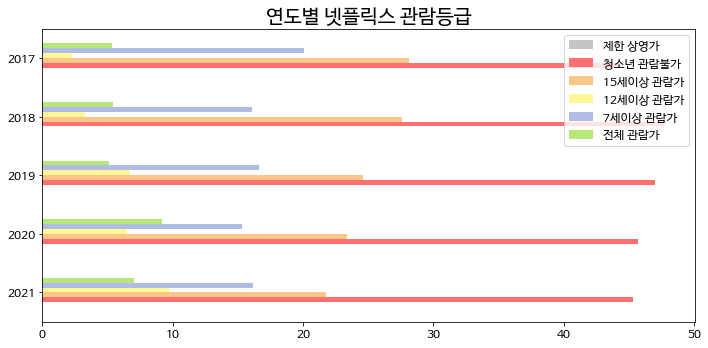

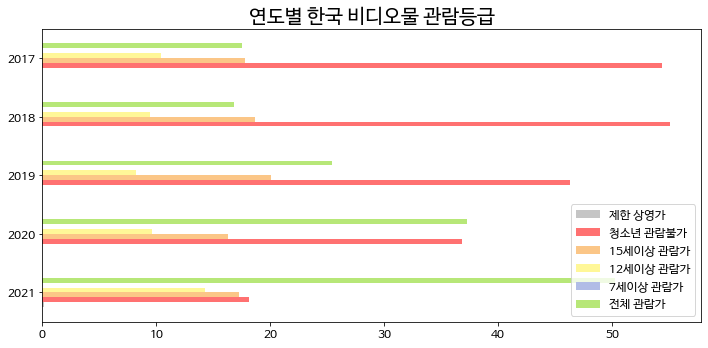

In [ ]:
#연도별 넷플릭스 관람등급
nn_ya = ['2021','2020','2019','2018','2017']
nn_a = [7.009346,9.153805,5.074627,5.385557,5.344828]
nn_7 = [16.154873,15.274082,16.616915,16.095471,20.086207]
nn_12 = [9.746328,6.492815,6.716418,3.243574,2.241379]
nn_15 = [21.762350,23.363491,24.577114,27.600979,28.103448]
nn_cn = [45.327103,45.715806,47.014925,47.674419,44.224138]
nn_l = [0,0,0,0,0]

nn_data = {'제한 상영가': nn_l, '청소년 관람불가': nn_cn, '15세이상 관람가': nn_15, '12세이상 관람가': nn_12, '7세이상 관람가': nn_7, '전체 관람가': nn_a}

nn_frame = pandas.DataFrame(
    nn_data, columns=['제한 상영가', '청소년 관람불가', '15세이상 관람가', '12세이상 관람가', '7세이상 관람가', '전체 관람가'], index=nn_ya)

nn_frame.plot.barh(figsize=(10, 5), color=['#C5C5C5', '#FF7171', '#FBC687', '#FFF798', '#B1BCE6', '#B7E778'])

plt.title('연도별 넷플릭스 관람등급', fontsize=20)
plt.tight_layout()

#연도별 한국 비디오물 관람등급
kn_ya = ['2021','2020','2019','2018','2017']
kn_a = [50.219922,37.254902,25.437802,16.791209,17.547930]
kn_7 = [0,0,0,0,0]
kn_12 = [14.238896,9.627954,8.212560,9.465201,10.367566]
kn_15 = [17.291936,16.327300,20.033213,18.666667,17.743314]
kn_cn = [18.102630,36.789844,46.316425,55.076923,54.341189]
kn_l = [0.146615,0,0,0,0]

kn_data = {'제한 상영가': kn_l, '청소년 관람불가': kn_cn, '15세이상 관람가': kn_15, '12세이상 관람가': kn_12, '7세이상 관람가': kn_7, '전체 관람가': kn_a}

kn_frame = pandas.DataFrame(
    kn_data, columns=['제한 상영가', '청소년 관람불가', '15세이상 관람가', '12세이상 관람가', '7세이상 관람가', '전체 관람가'], index=kn_ya)

kn_frame.plot.barh(figsize=(10, 5), color=['#C5C5C5', '#FF7171', '#FBC687', '#FFF798', '#B1BCE6', '#B7E778'])

plt.title('연도별 한국 비디오물 관람등급', fontsize=20)

plt.tight_layout()
plt.show()